In [180]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [181]:
data = pd.read_csv('full.csv')
print(data.shape)
print(data.head())
socMon = data['socMon']
btSoc = data['btSoc']
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
print(data.shape)
print(data.head())

(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN
(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN


### Features represented in respective units
 - vbatt in volt
 - ibatt in Amp
 - tempr in Celsius
 



In [182]:
data['vbatt'] = data['vbatt'].apply(lambda x: x * 1.0/100.0)
data['ibatt'] = data['ibatt'].apply(lambda x: x * 1.0/100.0)
data['tempr'] = data['tempr'].apply(lambda x: int(x, 16)/4.0)
print(data.head())

   vbatt  ibatt  tempr socMon btSoc  Unnamed: 5
0   3.89   0.25  23.50     93  96f0         NaN
1   3.91   0.12  30.00     98  9bf0         NaN
2   3.74   0.55  13.50     00  64f0         NaN
3   3.76   0.45  15.75     00  6c70         NaN
4   3.99   0.11  25.75     ad  aff0         NaN


### Target values in correct ranges
 - socMon and btSoc from 0.0 to 1.0

In [183]:
print(socMon.head())
print(btSoc.head())
socMon = socMon.apply(lambda x: int(x, 16)/255.0)
btSoc = btSoc.apply(lambda x: int(x, 16)/pow(2, 16))
data['socMon'] = data['socMon'].apply(lambda x: int(x, 16)/255.0)
data['btSoc'] = data['btSoc'].apply(lambda x: int(x, 16)/pow(2, 16))
print(socMon.head())
print(btSoc.head())


0    93
1    98
2    00
3    00
4    ad
Name: socMon, dtype: object
0    96f0
1    9bf0
2    64f0
3    6c70
4    aff0
Name: btSoc, dtype: object
0    0.576471
1    0.596078
2    0.000000
3    0.000000
4    0.678431
Name: socMon, dtype: float64
0    0.589600
1    0.609131
2    0.394287
3    0.423584
4    0.687256
Name: btSoc, dtype: float64


### Describe the features

In [184]:
print(np.min(socMon), np.mean(socMon), np.max(socMon), np.median(socMon), np.std(socMon))

0.0 0.5380509218612815 0.933333333333 0.607843137255 0.2722766754164631


### Plot individual features vs. target

   vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
0   3.89   0.25  23.50  0.576471  0.589600         NaN
1   3.91   0.12  30.00  0.596078  0.609131         NaN
2   3.74   0.55  13.50  0.000000  0.394287         NaN
3   3.76   0.45  15.75  0.000000  0.423584         NaN
4   3.99   0.11  25.75  0.678431  0.687256         NaN


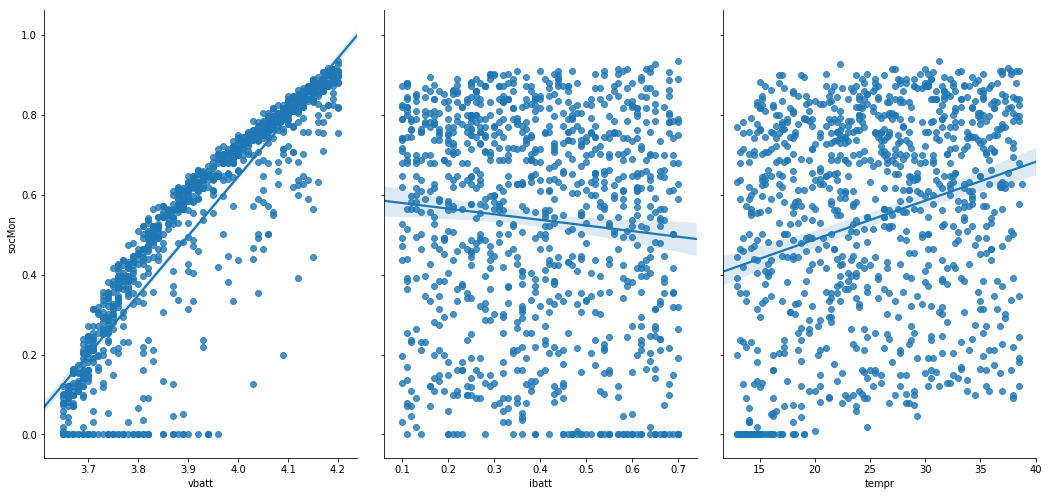

In [185]:
sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')
#sns.pairplot(data, x_vars=['ibatt'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='ibatt')
#sns.pairplot(data, x_vars=['tempr'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='tempr')
#sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='btSoc', size = 7, aspect = 0.7, kind='reg')
full_data = data.copy()
print(full_data.head())
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
data.drop(['Unnamed: 5'], axis=1, inplace=True)

### To again  show relation betw each feature and SoC, using subset of data

(1005, 6)
    vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
3    3.76   0.45  15.75  0.000000  0.423584         NaN
6    3.75   0.39  37.00  0.372549  0.394287         NaN
7    4.07   0.34  31.50  0.788235  0.794678         NaN
9    4.19   0.47  38.25  0.909804  0.911865         NaN
11   4.12   0.34  17.75  0.815686  0.843506         NaN
14   3.82   0.41  30.25  0.501961  0.521240         NaN
18   3.71   0.41  23.50  0.227451  0.267334         NaN
21   3.70   0.37  38.50  0.192157  0.218506         NaN
22   3.81   0.44  17.25  0.203922  0.511475         NaN
26   3.65   0.49  16.25  0.000000  0.150146         NaN
(347, 6)


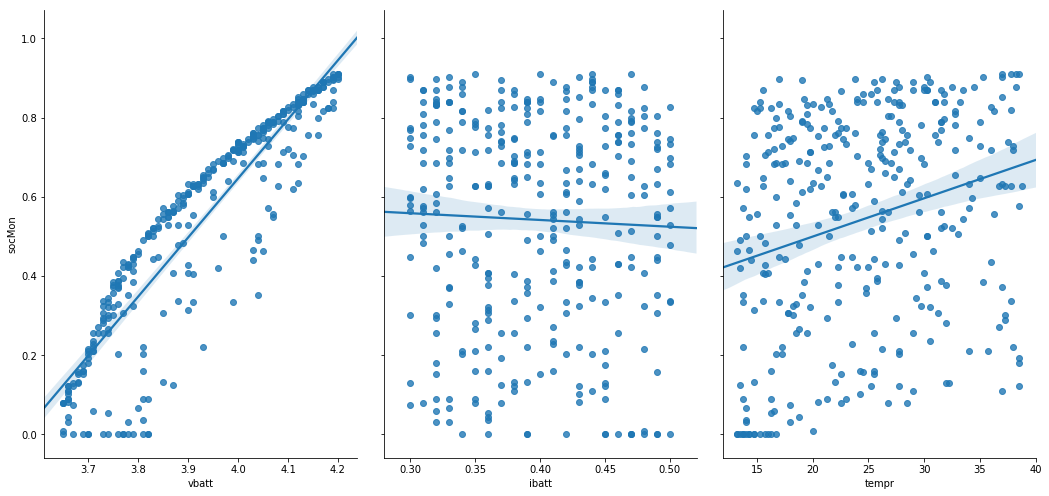

In [186]:
print(full_data.shape)
full_data.drop(full_data[full_data.ibatt > 0.5].index, inplace=True)
full_data.drop(full_data[full_data.ibatt < 0.3].index, inplace=True)
print(full_data.head(10))
print(full_data.shape)
sns.pairplot(full_data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')

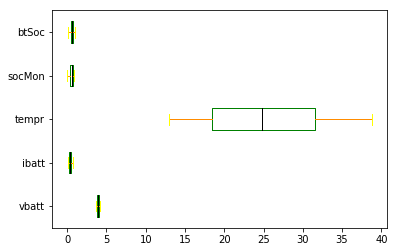

In [187]:
color = dict(boxes='Green', whiskers='DarkOrange', medians='Black', caps='Yellow')
data.plot.box(color=color, sym='r+', vert=False)

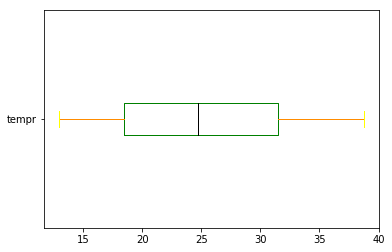

In [188]:
data['tempr'].plot.box(color=color, sym='r+', vert=False)

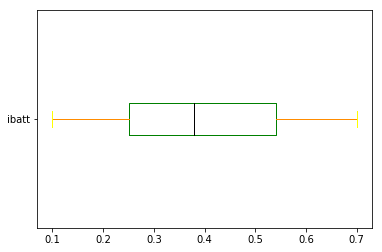

In [189]:
data['ibatt'].plot.box(color=color, sym='r+', vert=False)

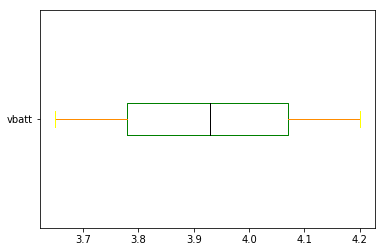

In [190]:
data['vbatt'].plot.box(color=color, sym='r+', vert=False)

(1005, 5)
[ 0.2514883   0.01266488  0.96494313  0.05203125  0.05263781]
vbatt      4.170000
ibatt      0.210000
tempr     16.000000
socMon     0.862745
btSoc      0.872803
Name: 230, dtype: float64


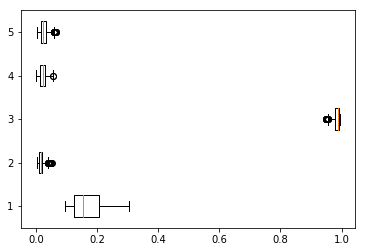

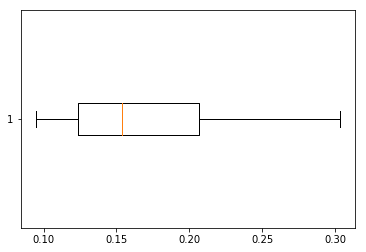

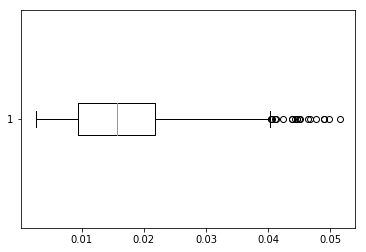

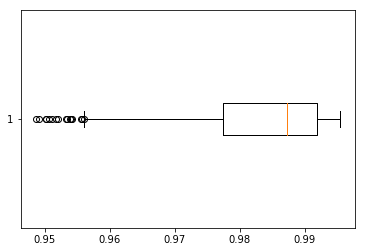

In [191]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data)
print(normalized_data.shape)
print(normalized_data[230])
print(data.iloc[230])
vs.dobox(normalized_data)
vs.dobox(normalized_data[:,0])
vs.dobox(normalized_data[:,1])
vs.dobox(normalized_data[:,2])


### Normalized and Scaled features
- The box plots below show that both, the features as well as target (socMon), lie in similar ranges and with mean close or equal to zero


(1005, 5)


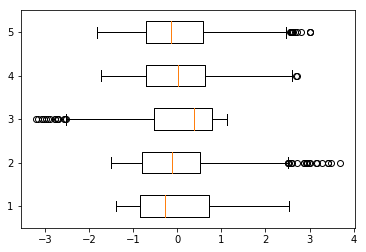

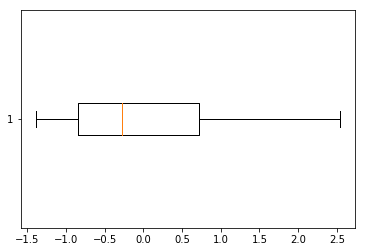

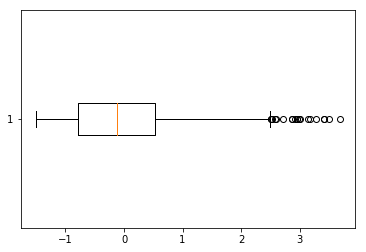

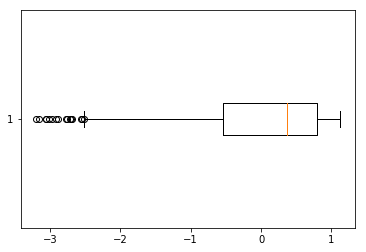

Below is boxplot for the target variable socMon:


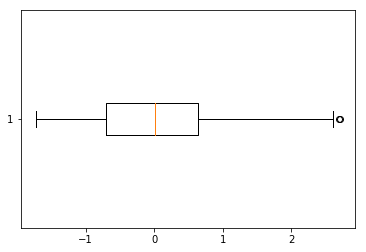

In [192]:
normAndScaled_data = preprocessing.scale(normalized_data)
print(normAndScaled_data.shape)
vs.dobox(normAndScaled_data)
vs.dobox(normAndScaled_data[:,0])
vs.dobox(normAndScaled_data[:,1])
vs.dobox(normAndScaled_data[:,2])
print("Below is boxplot for the target variable socMon:")
vs.dobox(normAndScaled_data[:,3])



In [193]:
socMon = normAndScaled_data[:,3]
btSoc = normAndScaled_data[:,4]
print(type(socMon))
print(type(normAndScaled_data))
print(normAndScaled_data.shape)
print(normAndScaled_data)
normAndScaled_data = np.delete(normAndScaled_data, [3, 4], 1)  # delete 3rd and 4th cols
print(normAndScaled_data)
print(normAndScaled_data.shape)
print(type(normAndScaled_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1005, 5)
[[-0.09864681 -0.66905671  0.24638056  0.17569613 -0.11612949]
 [-0.73859958 -1.36071149  0.73447982 -0.17736261 -0.46778203]
 [ 1.84797571  2.37666225 -1.91130346 -1.7257088   0.14146093]
 ..., 
 [ 1.12211107  0.82121058 -0.96504771 -0.9689771   0.2880361 ]
 [ 0.08223199  0.70329648  0.00716545  1.09955847  0.78279287]
 [ 1.74524898  1.55306019 -1.90104672  1.08400903  1.98285068]]
[[-0.09864681 -0.66905671  0.24638056]
 [-0.73859958 -1.36071149  0.73447982]
 [ 1.84797571  2.37666225 -1.91130346]
 ..., 
 [ 1.12211107  0.82121058 -0.96504771]
 [ 0.08223199  0.70329648  0.00716545]
 [ 1.74524898  1.55306019 -1.90104672]]
(1005, 3)
<class 'numpy.ndarray'>


In [195]:
print(socMon)
print(socMon.shape)

[ 0.17569613 -0.17736261 -1.7257088  ..., -0.9689771   1.09955847
  1.08400903]
(1005,)


### At this point, the features are cleaned and stored in the 1005x3 numpy array - normAndScaled_data. Target is stored in the 1005x1 numpy array socMon
### Do train-test split

In [212]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normAndScaled_data, socMon, test_size=0.20, random_state=1729)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(804, 3)
(804,)
(201, 3)
(201,)


### Build a linear regr model to explore possibilities

In [231]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
print(X_train)
print(X_train[:,0].shape)
vbat_X_train = X_train[:, np.newaxis, 0]
print(vbat_X_train.shape)
vbat_X_test = X_test[:, np.newaxis, 0]
print(vbat_X_test.shape)
#print(vbat_X_train)

regr = linear_model.LinearRegression()
regr.fit(vbat_X_train, y_train)
y_pred = regr.predict(vbat_X_test)

print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))



[[ 1.83523049  2.37031048 -1.96211886]
 [-0.61078912 -1.02409709  0.60774812]
 [ 0.3991805  -0.76598708 -0.2801373 ]
 ..., 
 [ 0.48041554 -0.39681484 -0.37248582]
 [-1.2641357  -0.21007894  1.05767658]
 [ 0.72213194 -0.71429185 -0.46368849]]
(804,)
(804, 1)
(201, 1)
Mean squared error: 0.961
Variance (i.e, r2) score: 0.066


### Plot results of basic 1-feature lin regr model

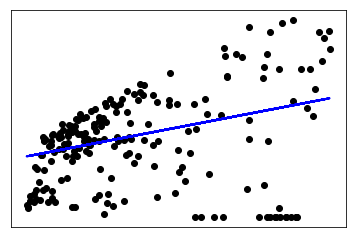

In [232]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(vbat_X_test, y_test,  color='black')
plt.plot(vbat_X_test, y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()


### The results are quite a low value of r2

### Build a NN

In [245]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(64, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(1, kernel_initializer='normal'))
model.summary()

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

early_stopping = EarlyStopping(monitor='val_loss', patience=90)
train_log = model.fit(X_train, y_train, batch_size=32,
                      epochs=500, validation_split=0.1, verbose=2, callbacks=[early_stopping])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                256       
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
__________

0s - loss: 0.8451 - val_loss: 0.9323
Epoch 135/500
0s - loss: 0.8452 - val_loss: 0.9371
Epoch 136/500
0s - loss: 0.8596 - val_loss: 0.9294
Epoch 137/500
0s - loss: 0.8408 - val_loss: 0.9309
Epoch 138/500
0s - loss: 0.8403 - val_loss: 0.9154
Epoch 139/500
0s - loss: 0.8279 - val_loss: 0.9194
Epoch 140/500
0s - loss: 0.8333 - val_loss: 0.9169
Epoch 141/500
0s - loss: 0.8130 - val_loss: 0.9106
Epoch 142/500
0s - loss: 0.8171 - val_loss: 0.9348
Epoch 143/500
0s - loss: 0.8269 - val_loss: 0.9098
Epoch 144/500
0s - loss: 0.8255 - val_loss: 0.9142
Epoch 145/500
0s - loss: 0.8214 - val_loss: 0.9238
Epoch 146/500
0s - loss: 0.8233 - val_loss: 0.9039
Epoch 147/500
0s - loss: 0.8181 - val_loss: 0.9074
Epoch 148/500
0s - loss: 0.8373 - val_loss: 0.9035
Epoch 149/500
0s - loss: 0.8246 - val_loss: 0.8963
Epoch 150/500
0s - loss: 0.8094 - val_loss: 0.8916
Epoch 151/500
0s - loss: 0.8212 - val_loss: 0.9113
Epoch 152/500
0s - loss: 0.8385 - val_loss: 0.9217
Epoch 153/500
0s - loss: 0.8133 - val_loss: 0

0s - loss: 0.6700 - val_loss: 0.6167
Epoch 298/500
0s - loss: 0.6521 - val_loss: 0.7999
Epoch 299/500
0s - loss: 0.5731 - val_loss: 0.6026
Epoch 300/500
0s - loss: 0.5344 - val_loss: 0.5586
Epoch 301/500
0s - loss: 0.6182 - val_loss: 0.5586
Epoch 302/500
0s - loss: 0.6151 - val_loss: 0.5750
Epoch 303/500
0s - loss: 0.5752 - val_loss: 0.6429
Epoch 304/500
0s - loss: 0.5995 - val_loss: 0.5409
Epoch 305/500
0s - loss: 0.5733 - val_loss: 0.6515
Epoch 306/500
0s - loss: 0.5642 - val_loss: 0.5348
Epoch 307/500
0s - loss: 0.5856 - val_loss: 0.7910
Epoch 308/500
0s - loss: 0.6136 - val_loss: 0.8597
Epoch 309/500
0s - loss: 0.5791 - val_loss: 0.7717
Epoch 310/500
0s - loss: 0.5913 - val_loss: 0.5054
Epoch 311/500
0s - loss: 0.5944 - val_loss: 0.5427
Epoch 312/500
0s - loss: 0.5869 - val_loss: 0.5024
Epoch 313/500
0s - loss: 0.6107 - val_loss: 0.5422
Epoch 314/500
0s - loss: 0.5220 - val_loss: 0.4898
Epoch 315/500
0s - loss: 0.5234 - val_loss: 0.5573
Epoch 316/500
0s - loss: 0.5252 - val_loss: 0

0s - loss: 0.3020 - val_loss: 0.1523
Epoch 460/500
0s - loss: 0.2702 - val_loss: 0.4219
Epoch 461/500
0s - loss: 0.3544 - val_loss: 0.2201
Epoch 462/500
0s - loss: 0.2540 - val_loss: 0.1259
Epoch 463/500
0s - loss: 0.2484 - val_loss: 0.1185
Epoch 464/500
0s - loss: 0.2979 - val_loss: 0.2091
Epoch 465/500
0s - loss: 0.2769 - val_loss: 0.2477
Epoch 466/500
0s - loss: 0.2584 - val_loss: 0.4730
Epoch 467/500
0s - loss: 0.2765 - val_loss: 0.1962
Epoch 468/500
0s - loss: 0.2659 - val_loss: 0.1705
Epoch 469/500
0s - loss: 0.2193 - val_loss: 0.1576
Epoch 470/500
0s - loss: 0.2701 - val_loss: 0.1252
Epoch 471/500
0s - loss: 0.2477 - val_loss: 0.1369
Epoch 472/500
0s - loss: 0.2668 - val_loss: 0.3102
Epoch 473/500
0s - loss: 0.2937 - val_loss: 0.1480
Epoch 474/500
0s - loss: 0.2780 - val_loss: 0.1558
Epoch 475/500
0s - loss: 0.2754 - val_loss: 0.1629
Epoch 476/500
0s - loss: 0.2314 - val_loss: 0.1263
Epoch 477/500
0s - loss: 0.2984 - val_loss: 0.1425
Epoch 478/500
0s - loss: 0.3114 - val_loss: 0

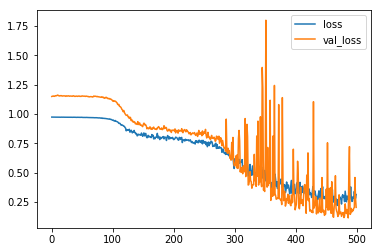

In [246]:
plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()

In [247]:
y_pred = model.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.170
Variance (i.e, r2) score: 0.835


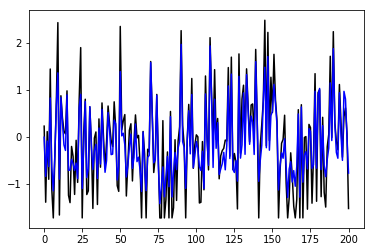

In [253]:
plt.plot(y_test,  color='black')
plt.plot(y_pred,  color='blue')

#plt.xticks(())
#plt.yticks(())

plt.show()
